In [35]:
import numpy as np
import matplotlib.pyplot as plt
import random as random
state_wheather = ("sunny", "cloudy", "rainy")
transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))

### Задание 1. 
###### Выберите произвольное начальное состояние и смоделируйте 20000 последующих состояний в цепи Маркова с введенной выше матрицей переходов. Результат моделирования (массив размера 20000) запишите в переменную states.

In [36]:
states = np.empty(20000)
states[0] = 0
wheather = np.array((1,0,0))
for i in range(19999):
    k = np.random.choice(3, p = np.dot(wheather,transition_matrix))
    states[i+1] = k
    wheather = np.zeros(3)
    wheather[k] = 1
print (states)

[0. 0. 1. ... 0. 0. 0.]


### Задание 2. 
###### На основе массива states рассчитайте, как меняется частота встречаемости каждого из типов погоды в массиве states[:n] для n, возрастающих от 1 до 20000. На одном рисунке покажите 3 графика: по оси х откладывайте n, по у - частоту для каждого из трех типов погоды. 

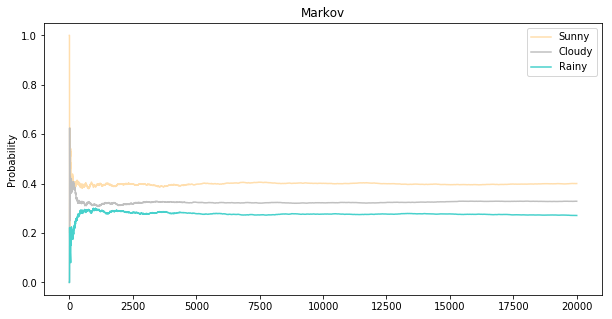

In [48]:
static = np.empty([20000, 3])
for n in range(20000):
    static[n, 0] = (states[:n+1]==0).sum() / (n + 1)
    static[n, 1] = (states[:n+1]==1).sum() / (n + 1)
    static[n, 2] = 1 - static[n, 0] - static[n, 1]
plt.figure(figsize=(10,5))
plt.plot(np.arange(20000),static[:, 0], label = "Sunny", color = 'navajowhite')
plt.plot(np.arange(20000),static[:, 1], label = "Cloudy", color = 'silver')
plt.plot(np.arange(20000),static[:, 2] , label = "Rainy", color = 'mediumturquoise')
plt.legend()
plt.ylabel('Probability')
plt.title('Markov')
plt.show()

### Задание 3. 
###### Как следует из картинки, частоты сходятся к некоторым стационарным значениям. Убедитесь, что эти значения совпадают с решением уравнения на стационарную плотность πP=π, где P - это матрица переходных вероятностей (transition_matrix), а вектор π - искомая стационарная плотность. Дополнительно убедитесь, это этот же вектор возникает в строках матрицы P, при возведении ее во все большие степени.

In [49]:
print( np.array((static[n, :])) )
print( np.dot(np.array((static[n, :])), transition_matrix) )
k = random.randint(10, 20000)
print( np.linalg.matrix_power(transition_matrix, k) )

[0.40035 0.3286  0.27105]
[0.393   0.33286 0.27414]
[[0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]]
